# CLASSIFICATION EXERCISES

In [1]:
# Useful imports
import numpy as np
import pandas as pd
from matplotlib import pylab

# Settings for plots
%pylab inline

pylab.rcParams['figure.figsize'] = (10.0, 6.0)
font = {'size'   : 18}
pyplot.rc('font', **font)

pyplot.rc('xtick', labelsize=14) 
pyplot.rc('ytick', labelsize=14) 

Populating the interactive namespace from numpy and matplotlib


## EXERCISE 1

The goal of the exercise is to experiment with various classification methods.

The UCI hand-written digits datasets contains hand-written, labelled samples of the 0-9 digits.

Experiment with classification methods and try to minimize test error on this dataset:
1. Reduce the data set dimensionality
2. Train one of the classification methods from sklearn on the training set
3. Compute the classification accuracy on the test set
4. Visualize the confusion matrix

In [2]:
from sklearn import datasets

dataset = datasets.load_digits()
digits = dataset.data
labels = dataset.target

In [3]:
# Divide the data into a training and a test set.
from sklearn.cross_validation import train_test_split

random_state = 0  # Fixed so that everybody has got the same split
test_set_fraction = 0.3
x_train, x_test, t_train, t_test = train_test_split(digits, labels, 
                                                    test_size=test_set_fraction, 
                                                    random_state=random_state)

In [4]:
def show_digit(digit):
    """ Utility function to display an handwritten digit. """
    digit = digit.reshape(8, 8)
    imshow(digit, cmap=cm.gray, interpolation='nearest')
    axis('off')


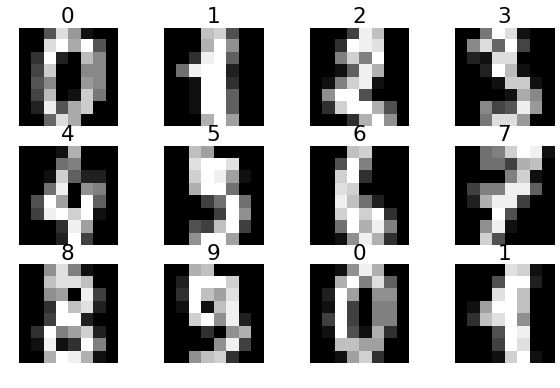

In [5]:
# Display a few samples from the database.
for idx, digit in enumerate(digits[:12,:]):
    subplot(3, 4, idx+1)
    show_digit(digit)
    title(labels[idx])

In [6]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=20, whiten=True)
pca.fit(x_train)
pca_train = pca.transform(x_train)
pca_test = pca.transform(x_test)

In [7]:
from sklearn import svm

method = svm.SVC(kernel='rbf')
method.fit(pca_train, t_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [8]:
print 'Accuracy =', method.score(pca_test, t_test)

Accuracy = 0.988888888889


In [9]:
from sklearn.metrics import confusion_matrix

y_test = method.predict(pca_test)
confusion_matrix(t_test, y_test)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  0,  0, 58,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 57]])